# Step-01

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [5]:
data = pd.read_csv('collegePlace.csv')

## Understandig dataset

In [7]:
data.ndim

2

In [8]:
data.shape

(2966, 8)

In [9]:
data.size

23728

In [10]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [11]:
data.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB
None


In [13]:
data.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

#### Here 'PlacedOrNot' is our target variable and categorical columns are ['Gender', 'Stream'] and numeric columns are ['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']

In [15]:
data.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [16]:
col1 = ['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']

for i in col1:
    print(data[i].value_counts())
    print()

Age
21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
30       1
29       1
Name: count, dtype: int64

Gender
Male      2475
Female     491
Name: count, dtype: int64

Stream
Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: count, dtype: int64

Internships
0    1331
1    1234
2     350
3      51
Name: count, dtype: int64

CGPA
7    956
8    915
6    834
9    165
5     96
Name: count, dtype: int64

Hostel
0    2168
1     798
Name: count, dtype: int64

HistoryOfBacklogs
0    2396
1     570
Name: count, dtype: int64

PlacedOrNot
1    1639
0    1327
Name: count, dtype: int64



## Data Cleaning

In [18]:
df = data.copy()

In [19]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [20]:
df['PlacedOrNot'].value_counts()

PlacedOrNot
1    1639
0    1327
Name: count, dtype: int64

In [21]:
num_data = df.select_dtypes(exclude=['object'])

In [22]:
print('Shape and size of original data: ',df.shape,' ', df.size)
print('Shape and size of data with only numerical features: ',num_data.shape,' ', num_data.size)

Shape and size of original data:  (2966, 8)   23728
Shape and size of data with only numerical features:  (2966, 6)   17796


In [23]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Internships        2966 non-null   int64
 2   CGPA               2966 non-null   int64
 3   Hostel             2966 non-null   int64
 4   HistoryOfBacklogs  2966 non-null   int64
 5   PlacedOrNot        2966 non-null   int64
dtypes: int64(6)
memory usage: 139.2 KB


In [24]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [25]:
np.unique(df['Gender'])

array(['Female', 'Male'], dtype=object)

In [26]:
np.unique(df['Stream'])

array(['Civil', 'Computer Science', 'Electrical',
       'Electronics And Communication', 'Information Technology',
       'Mechanical'], dtype=object)

#### Hence there are no missing/null values

## Exploratory Data Analysis

In [29]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

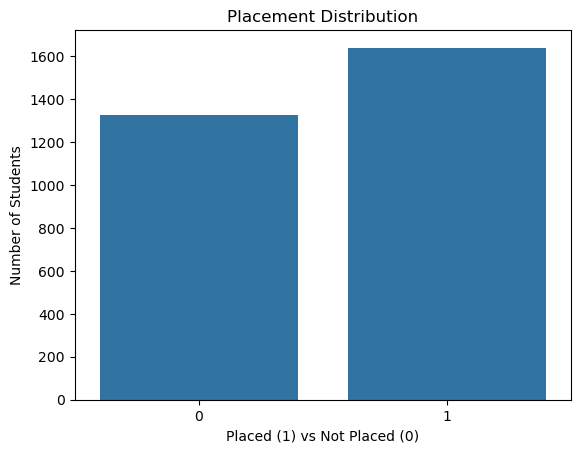

In [30]:
# Countplot of Placement Status
sns.countplot(x='PlacedOrNot', data=df)
plt.title("Placement Distribution")
plt.xlabel("Placed (1) vs Not Placed (0)")
plt.ylabel("Number of Students")
plt.show()

In [31]:
print(pd.crosstab(index=df['PlacedOrNot'], columns=df['Gender']))
print('\nRelationship through probabilities\n ')
print(pd.crosstab(index=df['PlacedOrNot'], columns=df['Gender'], normalize=True, margins=True))

Gender       Female  Male
PlacedOrNot              
0               216  1111
1               275  1364

Relationship through probabilities
 
Gender         Female      Male       All
PlacedOrNot                              
0            0.072825  0.374579  0.447404
1            0.092717  0.459879  0.552596
All          0.165543  0.834457  1.000000


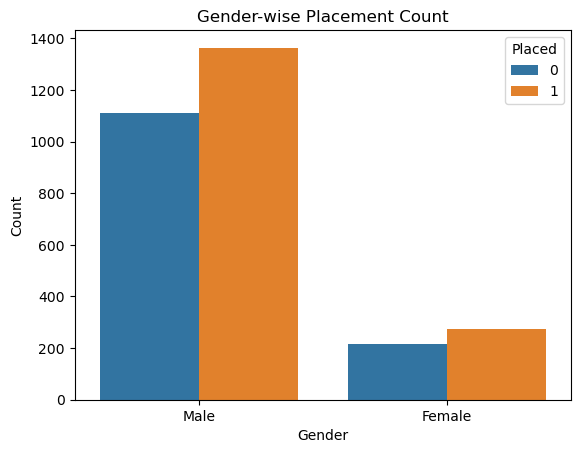

In [32]:
# Gender vs Placement
sns.countplot(x='Gender', hue='PlacedOrNot', data=df)
plt.title("Gender-wise Placement Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Placed')
plt.show()

In [33]:
print(pd.crosstab(index=df['Stream'], columns=df['PlacedOrNot']))
print('\nRelationship through probabilities\n ')
print(pd.crosstab(index=df['Stream'], columns=df['PlacedOrNot'], normalize=True, margins=True))

PlacedOrNot                      0    1
Stream                                 
Civil                          171  146
Computer Science               324  452
Electrical                     153  181
Electronics And Communication  173  251
Information Technology         282  409
Mechanical                     224  200

Relationship through probabilities
 
PlacedOrNot                           0         1       All
Stream                                                     
Civil                          0.057653  0.049225  0.106878
Computer Science               0.109238  0.152394  0.261632
Electrical                     0.051585  0.061025  0.112610
Electronics And Communication  0.058328  0.084626  0.142953
Information Technology         0.095078  0.137896  0.232974
Mechanical                     0.075523  0.067431  0.142953
All                            0.447404  0.552596  1.000000


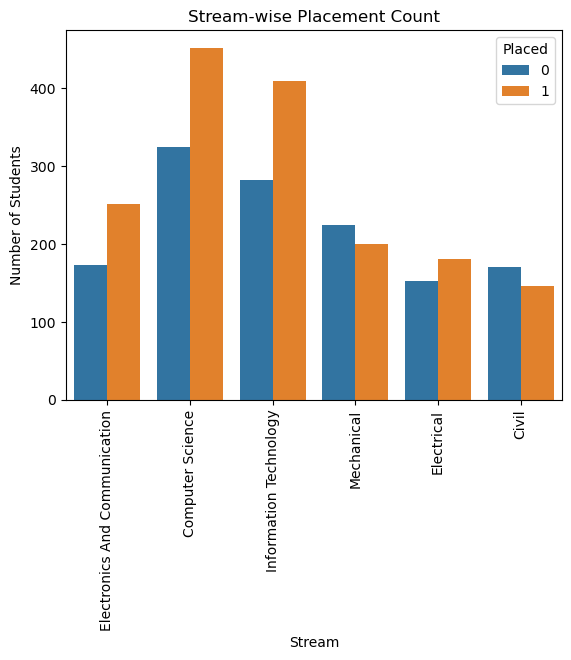

In [34]:
#Stream vs Placement
sns.countplot(x='Stream', hue='PlacedOrNot', data=df)
plt.title("Stream-wise Placement Count")
plt.xticks(rotation=90)
plt.ylabel("Number of Students")
plt.legend(title='Placed')
plt.show()

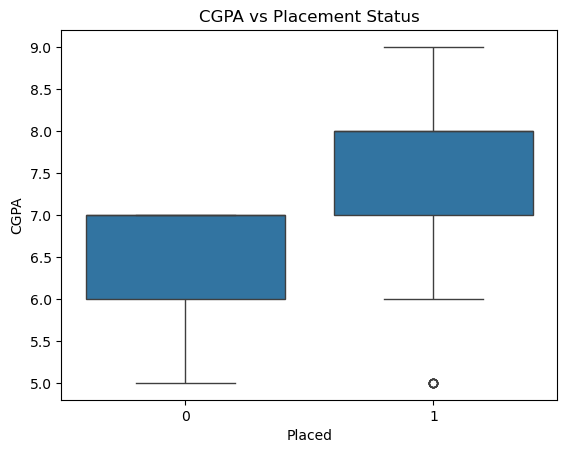

In [35]:
#Boxplot of CGPA vs Placement
sns.boxplot(x='PlacedOrNot', y='CGPA', data=df)
plt.title("CGPA vs Placement Status")
plt.xlabel("Placed")
plt.ylabel("CGPA")
plt.show()

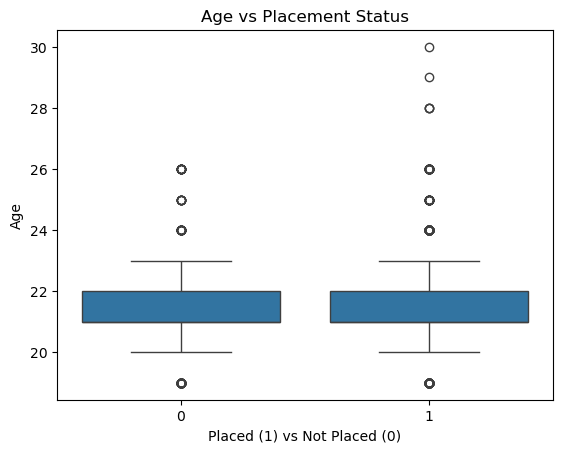

In [36]:
sns.boxplot(x='PlacedOrNot', y='Age', data=df)
plt.title("Age vs Placement Status")
plt.xlabel("Placed (1) vs Not Placed (0)")
plt.ylabel("Age")
plt.show()

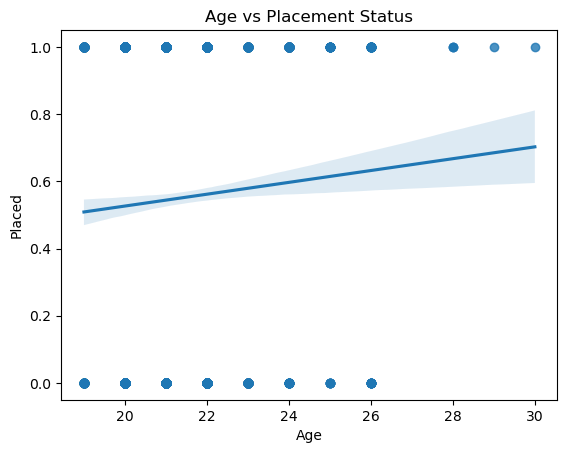

In [37]:
sns.regplot(y='PlacedOrNot', x='Age', data=df, fit_reg=True)
plt.title("Age vs Placement Status")
plt.ylabel("Placed")
plt.xlabel("Age")
plt.show()

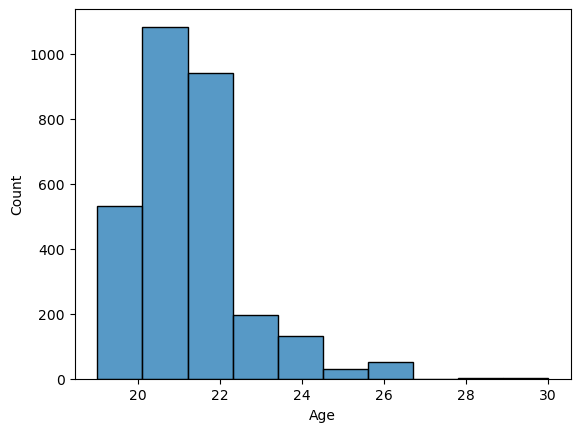

In [38]:
sns.histplot(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_11320\2014462744.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PlacedOrNot', y='Age', data=df, palette="Set2")


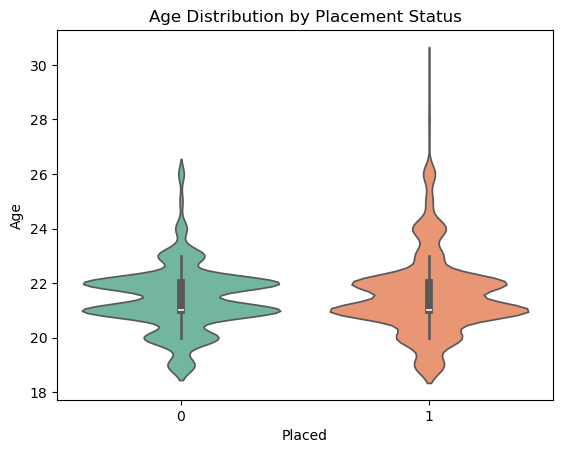

In [39]:
sns.violinplot(x='PlacedOrNot', y='Age', data=df, palette="Set2")
plt.title("Age Distribution by Placement Status")
plt.xlabel("Placed")
plt.ylabel("Age")
plt.show()

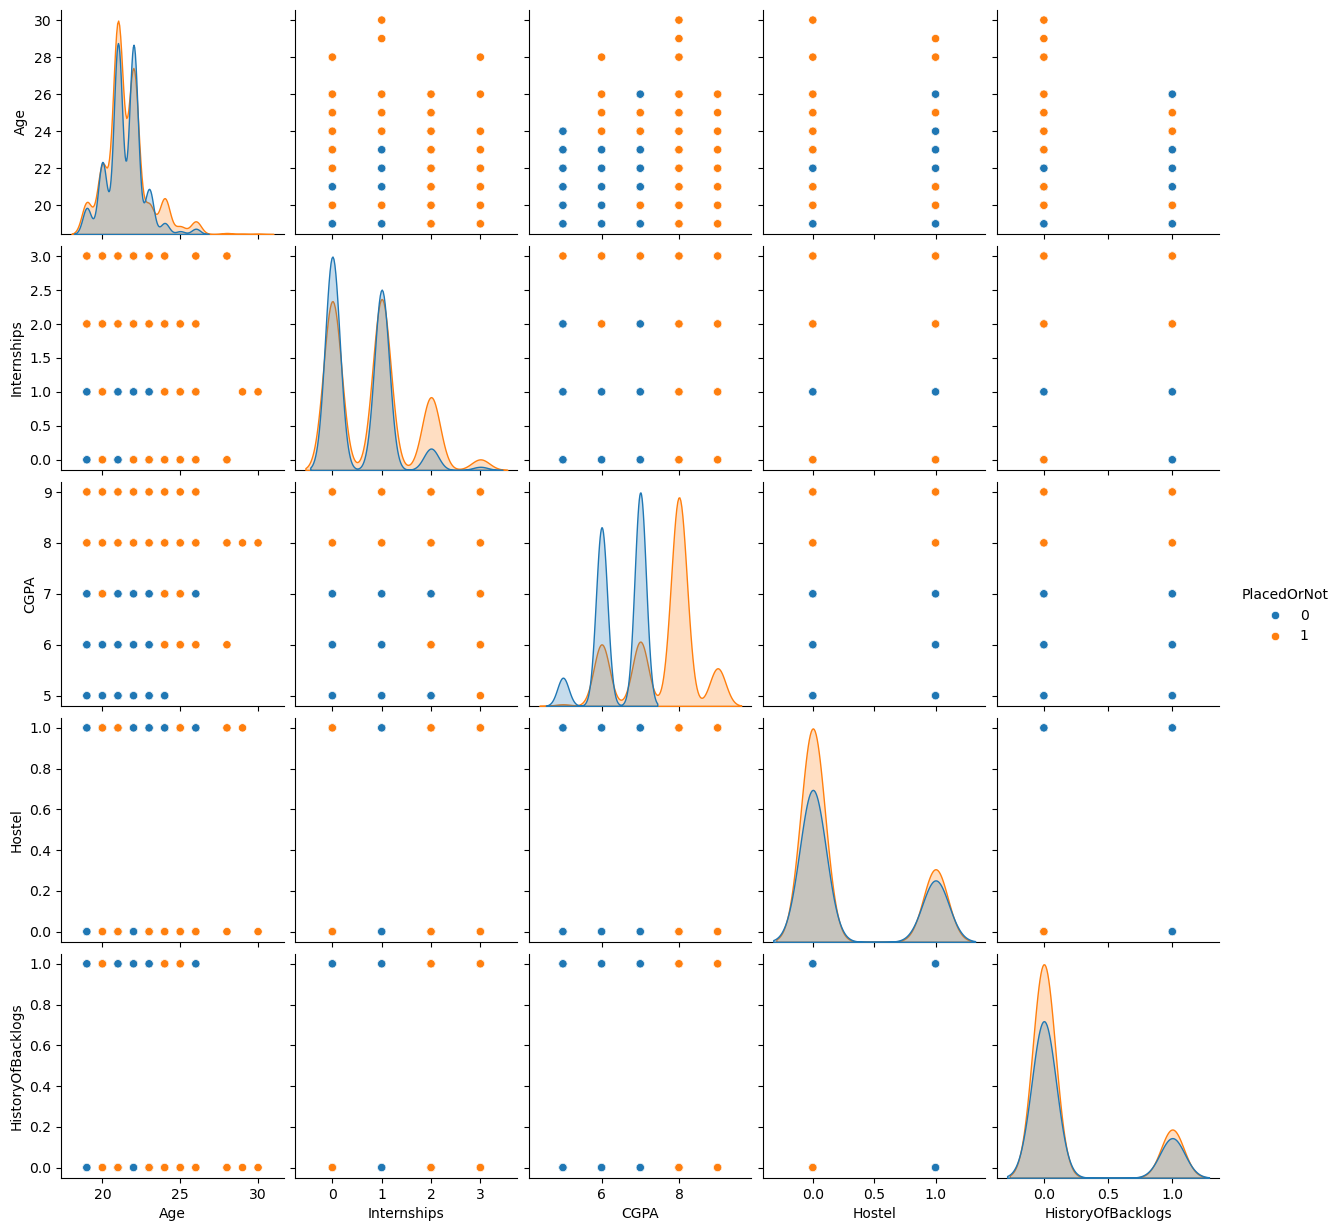

In [40]:
sns.pairplot(df, hue="PlacedOrNot")

In [41]:
corr_matrix = num_data.corr()
print(corr_matrix)

                        Age  Internships      CGPA    Hostel  \
Age                1.000000     0.006552 -0.119787  0.003042   
Internships        0.006552     1.000000  0.023496  0.004617   
CGPA              -0.119787     0.023496  1.000000  0.014991   
Hostel             0.003042     0.004617  0.014991  1.000000   
HistoryOfBacklogs -0.042586    -0.015118  0.002576  0.103506   
PlacedOrNot        0.046943     0.179334  0.588648 -0.038182   

                   HistoryOfBacklogs  PlacedOrNot  
Age                        -0.042586     0.046943  
Internships                -0.015118     0.179334  
CGPA                        0.002576     0.588648  
Hostel                      0.103506    -0.038182  
HistoryOfBacklogs           1.000000    -0.022337  
PlacedOrNot                -0.022337     1.000000  


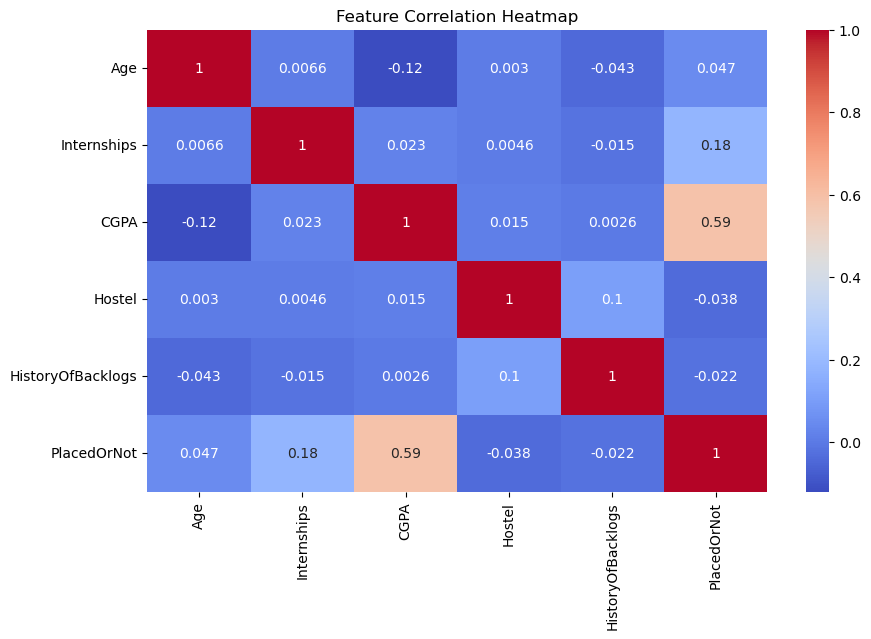

In [42]:
# Correlation Heatmap on numeric features
plt.figure(figsize=(10,6))
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
df.groupby('Internships')['PlacedOrNot'].mean()

Internships
0    0.491360
1    0.536467
2    0.805714
3    0.803922
Name: PlacedOrNot, dtype: float64

### Encoding categorical features

In [45]:
model_df = df.copy()

In [46]:
model_df = pd.get_dummies(model_df, columns=['Stream'], drop_first=True)

In [47]:
model_df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [48]:
model_df.head()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,1,8,1,1,1,False,False,True,False,False
1,21,0,0,7,1,1,1,True,False,False,False,False
2,22,0,1,6,0,0,1,False,False,False,True,False
3,21,1,0,8,0,1,1,False,False,False,True,False
4,22,1,0,8,1,0,1,False,False,False,False,True


In [49]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   2966 non-null   int64
 1   Gender                                2966 non-null   int64
 2   Internships                           2966 non-null   int64
 3   CGPA                                  2966 non-null   int64
 4   Hostel                                2966 non-null   int64
 5   HistoryOfBacklogs                     2966 non-null   int64
 6   PlacedOrNot                           2966 non-null   int64
 7   Stream_Computer Science               2966 non-null   bool 
 8   Stream_Electrical                     2966 non-null   bool 
 9   Stream_Electronics And Communication  2966 non-null   bool 
 10  Stream_Information Technology         2966 non-null   bool 
 11  Stream_Mechanical                     2966 

In [53]:
# Convert all boolean columns to integers
bool_cols = model_df.select_dtypes(include='bool').columns
model_df[bool_cols] = model_df[bool_cols].astype(int)


In [55]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   2966 non-null   int64
 1   Gender                                2966 non-null   int64
 2   Internships                           2966 non-null   int64
 3   CGPA                                  2966 non-null   int64
 4   Hostel                                2966 non-null   int64
 5   HistoryOfBacklogs                     2966 non-null   int64
 6   PlacedOrNot                           2966 non-null   int64
 7   Stream_Computer Science               2966 non-null   int32
 8   Stream_Electrical                     2966 non-null   int32
 9   Stream_Electronics And Communication  2966 non-null   int32
 10  Stream_Information Technology         2966 non-null   int32
 11  Stream_Mechanical                     2966 

### Model Building

In [59]:
from sklearn.model_selection import train_test_split

# Features and target
X = model_df.drop('PlacedOrNot', axis=1)
y = model_df['PlacedOrNot']

# 80/20 split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Train a Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8804713804713805

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       266
           1       0.91      0.87      0.89       328

    accuracy                           0.88       594
   macro avg       0.88      0.88      0.88       594
weighted avg       0.88      0.88      0.88       594

